# Digit Recognizer using TensorFlow and Deep Learning
## @author: @ruhend(Mudigonda Himansh)


# Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Loading data

In [2]:
test = pd.read_csv('test.csv') # Loading Test Data
train = pd.read_csv('train.csv') # Loading Train Data

# Shape of Dataset

test_shape = np.shape(test)
train_shape = np.shape(train)

img_size = (28,28)

print(f'Shape of Test Data : {test_shape}')
print(f'Shape of Train Data : {train_shape}')

Shape of Test Data : (28000, 784)
Shape of Train Data : (42000, 785)


# Data visualization

## Sample image from train data

Text(0.5, 1.0, 'Digit : 6')

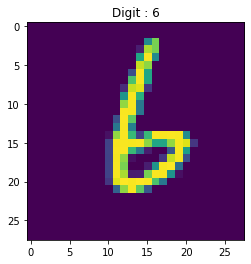

In [3]:
n = np.random.randint(0,train_shape[0]) # Generating Random Number
sample = train.iloc[n,1:]
sample = np.array(sample)
sample = np.reshape(sample,img_size)

plt.imshow(sample)
plt.title('Digit : ' + str(train.iloc[n,0]))

## Unique classes & their count

 Labels and their count :
 {1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795}


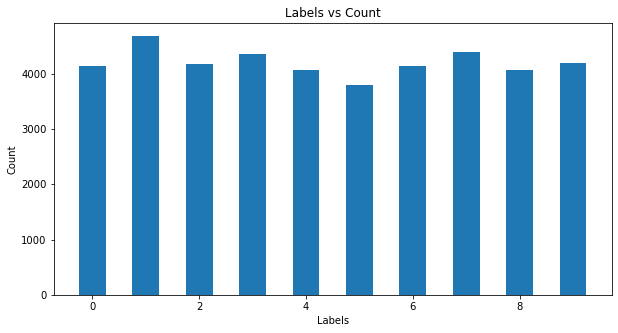

In [4]:
label_count = dict(train.label.value_counts())
print(f' Labels and their count :\n {label_count}')

x = list(label_count.keys())
y = list(label_count.values())

fig = plt.figure(figsize = (10,5))
plt.bar(x,y,width = 0.5)
plt.title('Labels vs Count')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

# Preprocessing

In [5]:
train_images = []

for i in range(train_shape[0]):
    data = train.iloc[i,1:]
    data = np.array(data)
    data = np.reshape(data,img_size)
    train_images.append(data)
    
train_images = np.array(train_images)

In [6]:
test_images = []

for i in range(test_shape[0]):
    data = test.iloc[i,:]
    data = np.array(data)
    data = np.reshape(data,img_size)
    test_images.append(data)

test_images = np.array(test_images)

In [7]:
train_labels = list(train.iloc[:,0])
train_labels = np.array(train_labels)
train_labels = np.reshape(train_labels,(train_shape[0],1))

In [8]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=10)

# DNN Model

In [9]:
Model = Sequential()
Model.add(Flatten()) # Flatten Layer
Model.add(Dense(units = 8192,activation = 'relu',input_shape = img_size))
Model.add(Dense(units = 4096, activation = 'relu'))
Model.add(Dense(units = 2048, activation = 'relu'))
Model.add(Dropout(0.5))
Model.add(Dense(units = 1024, activation = 'relu'))
Model.add(Dense(units = 512, activation = 'relu'))
Model.add(Dense(units = 256, activation = 'relu'))
Model.add(Dropout(0.5))
Model.add(Dense(units = 128, activation = 'relu'))
Model.add(Dense(units = 64, activation = 'relu'))
Model.add(Dense(units = 32, activation = 'relu'))
Model.add(Dense(units = 10, activation = 'softmax'))
Model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , 
              metrics = ['accuracy'])
hist = Model.fit(train_images, train_labels, batch_size = 32, epochs = 16)
Model.summary()

2022-02-23 21:34:40.231371: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/16
1313/1313 [==============================] - 466s 353ms/step - loss: 1.0986 - accuracy: 0.8003
Epoch 2/16
1313/1313 [==============================] - 529s 403ms/step - loss: 0.3348 - accuracy: 0.9309
Epoch 3/16
1313/1313 [==============================] - 497s 379ms/step - loss: 0.3005 - accuracy: 0.9411
Epoch 4/16
1313/1313 [==============================] - 499s 380ms/step - loss: 0.3354 - accuracy: 0.9387
Epoch 5/16
1313/1313 [==============================] - 500s 380ms/step - loss: 0.2253 - accuracy: 0.9527
Epoch 6/16
1313/1313 [==============================] - 505s 384ms/step - loss: 0.2679 - accuracy: 0.9515
Epoch 7/16
1313/1313 [==============================] - 500s 381ms/step - loss: 0.2292 - accuracy: 0.9550
Epoch 8/16
1313/1313 [==============================] - 518s 394ms/step - loss: 0.1979 - accuracy: 0.9613
Epoch 9/16
1313/1313 [==============================] - 519s 395ms/step - loss: 0.2001 - accuracy: 0.9606
Epoch 10/16
1313/1313 [=======================

In [10]:
predictions = Model.predict(test_images)
predictions = np.argmax(predictions,axis=1)

# Predicted image

Text(0.5, 1.0, 'Digit : 5')

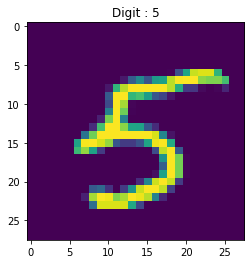

In [11]:
n = np.random.randint(0,test_shape[0]) # Generating Random Number
sample = test.iloc[n,:]
sample = np.array(sample)
sample = np.reshape(sample,img_size)

plt.imshow(sample)
plt.title('Digit : ' + str(predictions[n]))

# Result

In [12]:
results = []

for i in range(len(predictions)):
    results.append([i+1,predictions[i]])
    
results = pd.DataFrame(results, columns = ['ImageId','Label'], index = None)
results = results.set_index('ImageId')
results.head()

results.to_csv('Model_prediction_result.csv')